In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.datasets import fetch_california_housing
data =fetch_california_housing()
df = pd.DataFrame(data=data.data, columns=data.feature_names)

In [3]:
df['target'] = data.target 

In [4]:
df = df.sample(frac=0.3 )

In [5]:
x = df.iloc[:,:-1]
y = df.target

In [6]:
x.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
1956,1.5625,17.0,3.657143,0.921429,314.0,2.242857,38.73,-120.76
4060,3.6171,22.0,4.072841,1.060354,3303.0,1.718522,34.16,-118.45
12395,7.4382,11.0,10.822651,1.755926,2450.0,2.151010,33.72,-116.33
6752,4.6442,36.0,6.153527,1.093361,1231.0,2.553942,34.11,-118.09
9496,3.1071,18.0,5.657534,1.205479,711.0,2.434932,39.32,-123.70


In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3,random_state=1)
from sklearn.tree import DecisionTreeRegressor
clf = DecisionTreeRegressor()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

In [8]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.4566394750407179

In [9]:
parameter = {
    'criterion': ['squared_error', 'poissor'],
    'max_depth':[1, 2, 3, 4, 6, 8],
    'splitter':['best', 'random'],
    'max_features': ['sqrt', 'log2']
}
reg = DecisionTreeRegressor()

In [11]:
from sklearn.model_selection import GridSearchCV
model = GridSearchCV(reg, param_grid=parameter, cv = 5, scoring='neg_mean_squared_error')

In [12]:
model.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'poissor'],
                         'max_depth': [1, 2, 3, 4, 6, 8],
                         'max_features': ['sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [13]:
model.best_params_

{'criterion': 'squared_error',
 'max_depth': 8,
 'max_features': 'log2',
 'splitter': 'best'}

In [15]:
model.best_score_

np.float64(-0.567307667472033)

In [16]:
final_model = DecisionTreeRegressor(criterion = "squared_error", max_depth = 8)

In [18]:
final_model.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=8)

[Text(0.5527129120879121, 0.9444444444444444, 'x[0] <= 5.049\nsquared_error = 1.368\nsamples = 4334\nvalue = 2.1'),
 Text(0.28760302197802196, 0.8333333333333334, 'x[0] <= 2.884\nsquared_error = 0.86\nsamples = 3380\nvalue = 1.754'),
 Text(0.42015796703296704, 0.8888888888888888, 'True  '),
 Text(0.13650412087912087, 0.7222222222222222, 'x[6] <= 34.465\nsquared_error = 0.511\nsamples = 1408\nvalue = 1.31'),
 Text(0.053228021978021976, 0.6111111111111112, 'x[7] <= -118.305\nsquared_error = 0.527\nsamples = 718\nvalue = 1.518'),
 Text(0.018543956043956044, 0.5, 'x[5] <= 2.456\nsquared_error = 0.812\nsamples = 112\nvalue = 2.205'),
 Text(0.005494505494505495, 0.3888888888888889, 'x[2] <= 2.588\nsquared_error = 0.829\nsamples = 38\nvalue = 2.856'),
 Text(0.0027472527472527475, 0.2777777777777778, 'squared_error = 0.0\nsamples = 2\nvalue = 5.0'),
 Text(0.008241758241758242, 0.2777777777777778, 'x[2] <= 5.543\nsquared_error = 0.606\nsamples = 36\nvalue = 2.737'),
 Text(0.005494505494505495, 

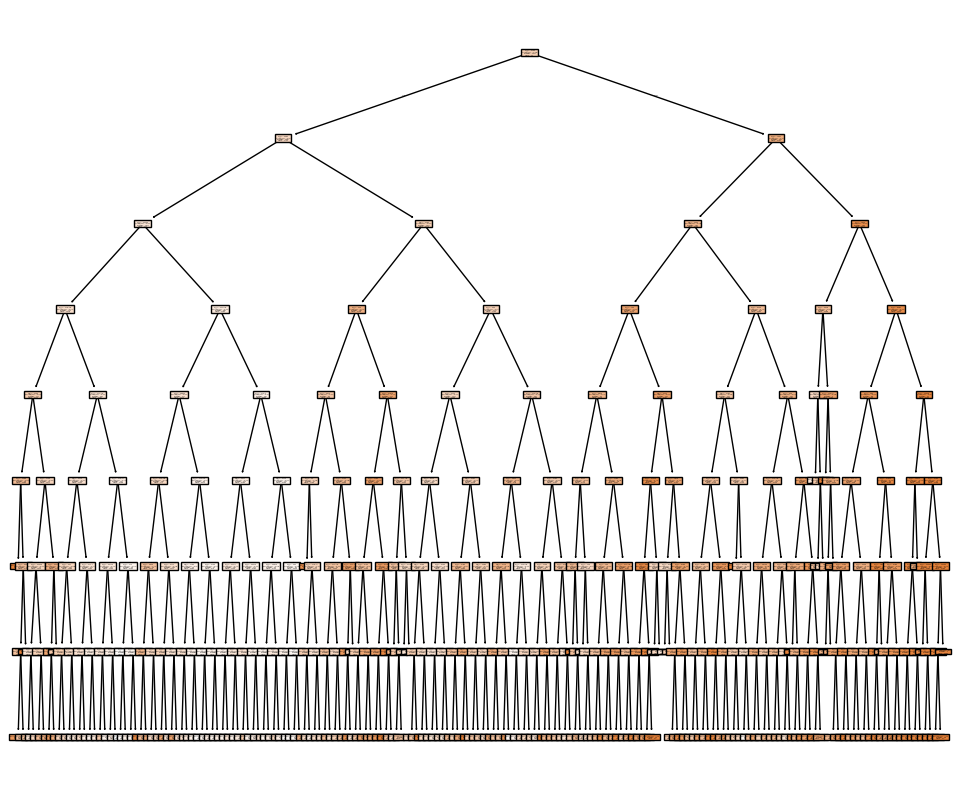

In [19]:
from sklearn import tree
plt.figure(figsize = (12,10))
tree.plot_tree(final_model, filled=True)

In [21]:
y_pred = final_model.predict(x_test)

In [23]:
r2_score(y_test, y_pred)

0.6212624012519049